Predicting Number On Images.

Importing Libraries

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [2]:
digits = load_digits()
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


Visualising the sample data

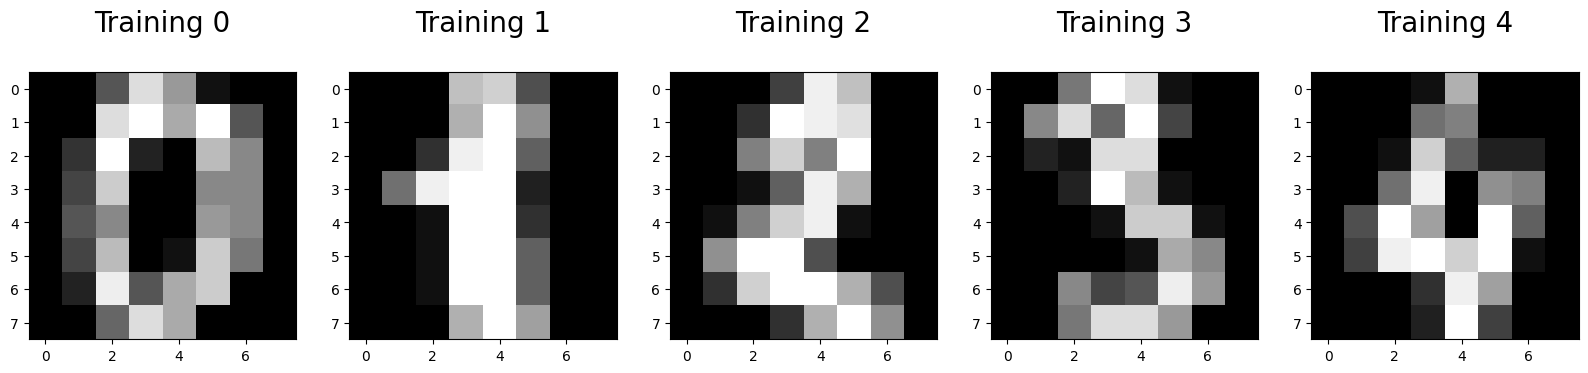

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape( image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training %i\n'% label, fontsize = 20)

Spliting the data into training and test datasets.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)

In [5]:
print(x_train.shape)

(1383, 64)


In [6]:
print(y_train.shape)

(1383,)


In [7]:
print(x_test.shape)

(414, 64)


In [8]:
print(y_test.shape)

(414,)


Train the Model

In [9]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr = LogisticRegression(solver='saga', penalty='l1', max_iter=2000, C=1.0)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=2000, penalty='l1', solver='saga')

In [10]:
#Return a NumPy Array
#Predict for One Observations (image)

print(logisticRegr.predict(x_test[0].reshape(1, -1)))

[4]


In [11]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [12]:
predictions = logisticRegr.predict(x_test)

In [13]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9541062801932367


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Confusion matrix for predicting the number on images.

In [15]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  2  0  1  0  1  1 29]]


Analysing the Prediction and Actual labels

Text(0.5, 1.0, "('Accuracy Score: {0}', '0.9541062801932367')")

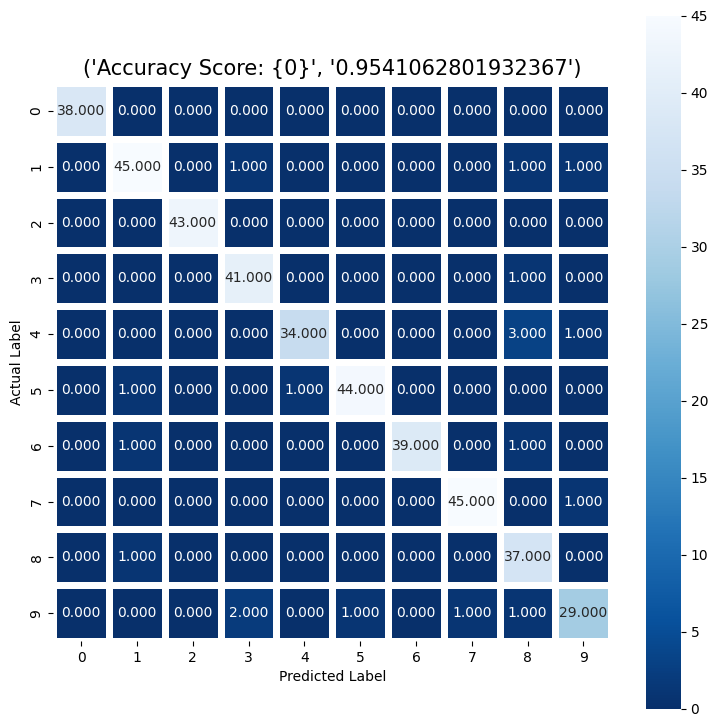

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = 5, square = True, cmap = "Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = 'Accuracy Score: {0}',format(score)
plt.title(all_sample_title, size = 15)

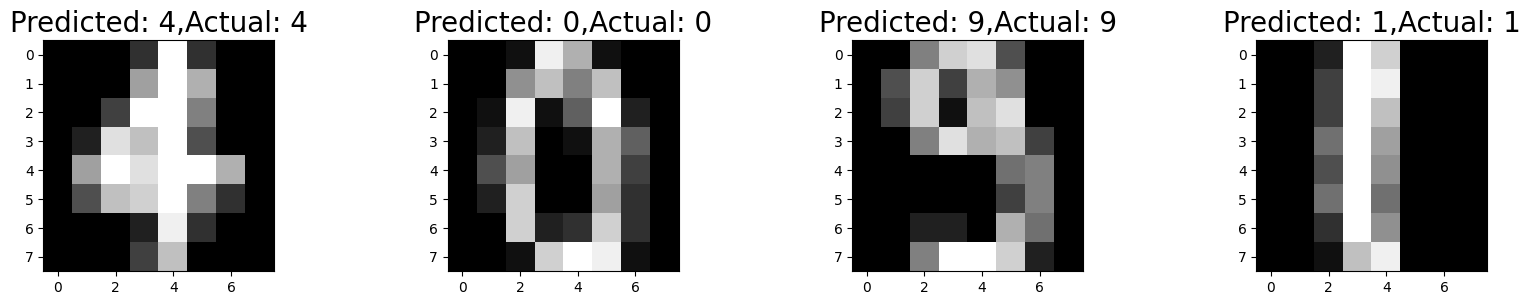

In [17]:
index = 0 
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize= (20,3))

for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap = plt.cm.gray)
    plt.title('Predicted: {},Actual: {}' .format(predictions[wrong], y_test[wrong]), fontsize = 20)